# Non-linear decision boundary
The following exercise experiments with a dataset (see visualization in the cell below), where a linear model cannot seperate the different classes in the data.

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#linear">Task 1: Non-linear decision boundary</a>
            </li>
            <li>
            <a href="#manual">Task 2: Circular boundary</a>
            </li>
            <li>
            <a href="#predict2">Task 3: Predictions for non-linear data</a>
            </li>
            <li>
            <a href="#predict53">Task 4: Predictions for non-linear data</a>
            </li>
            <li>
            <a href="#polar">Task 5: Polar coordinates</a>
            </li>
        </ul>
    </div>
</article>

Run the cell below to load libraries and functions and construct the dataset:


In [1]:
import numpy as np  # numeriacal computing
import matplotlib.pyplot as plt  # plotting core


def accuracy(predictions,targets):
    """
    :param predictions: 1D-array of predicted classes for the data.
    :param targets: 1D-array of actual classes for the data.

    :return: fraction of correctly predicted points (num_correct/num_points).
    """

    acc = np.sum(predictions == targets)/len(predictions)
    return acc

### Data generation
q1 = np.random.multivariate_normal([0, 0], [[.5, 0], [0, .5]], 400)

t = np.linspace(0, 2 * np.pi, 400)  ##
q2 = np.array([(3 + q1[:, 0]) * np.sin(t), (3 + q1[:, 1]) * np.cos(t)]).T

The data of the two classes (`class 1`
 and `class 2`
) are stored in the variables `q1`
 and `q2`
, respectively. The following cell visualize the dataset of the two classes. `class 1`
 is labelled with 0s and `class 2`
 with 1s.


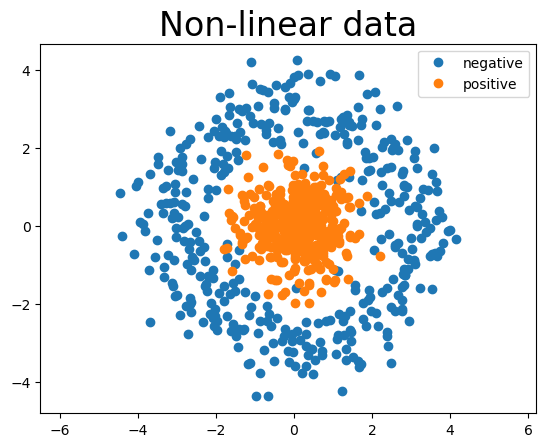

In [11]:
fig, ax = plt.subplots()
ax.plot(q2[:, 0], q2[:, 1], "o", label='negative')
ax.plot(q1[:, 0], q1[:, 1], "o", label='positive')

plt.title("Non-linear data", fontsize=24)
ax.axis('equal')
plt.legend()
plt.show()

<article class="message task"><a class="anchor" id="linear"></a>
    <div class="message-header">
        <span>Task 1: Non-linear decision boundary</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


The graph below shows how linear model performs on the current dataset (see last week
 ).
1. Using your observations about linear classification models, explain whether a linear classifier is an appropriate solution for the current data.
2. Which other models might provide a better fit to this dataset?



</div></article>



In [0]:
# write your reflections here
"""
1. No, it would classify a lot of the data incorrectly.

2. Non-linear models. Higher-dimension transformations.

"""

<article class="message task"><a class="anchor" id="manual"></a>
    <div class="message-header">
        <span>Task 2: Circular boundary</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


In this task the prediction function $f_w(x)$ is defined as a circular boundary centered in $[0,0]^T$.
1. Run the cell below to plot the circular boundary and the data points.
2. Change the radius of the decision boundary and determine which radius seems to best separate the classes?
3. Change the decision boundary and investigate how this affects the balance between false positives and false negatives? How does an overly large or small radius affect false positives and false negatives respectively? 

<article class="message is-warning">
  <div class="message-header">Understanding the code</div>
  <div class="message-body">
  
  The parametric equation of a circle, ([described in detail here](https://mathopenref.com/coordparamcircle.html)
) is given by:

$$
x = r \cos(t) \\
y = r \sin(t)
$$
where  $r$  is the radius of the circle and  $t$  represents angles (in radians) that range from  0  to  $2\pi$ .

  
  </div>
</article>



</div></article>



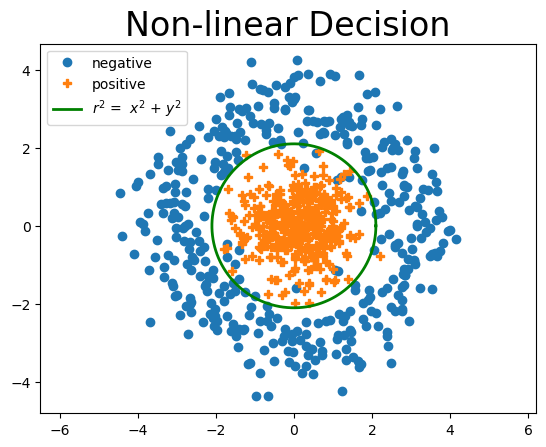

In [46]:
def circle_boundary(t, radius):
    """
    :param t: angle data points of the circle.
    :param radius: radius of the circle
    :return: (x-values,y-values) of the circle points .
    """
    return (radius * np.cos(t), radius * np.sin(t))


fig, ax = plt.subplots()
ax.plot(q2[:, 0], q2[:, 1], "o", label='negative')
ax.plot(q1[:, 0], q1[:, 1], "P", label='positive')

t = np.linspace(0, 2 * np.pi, 400)  ### linspace of angles.
r = 2.1  # radius
x_c, y_c = circle_boundary(t, r)

ax.plot(x_c, y_c, "g",linewidth=2, label=r'$r^2$ =  $x^2$ + $y^2$')
plt.title("Non-linear Decision", fontsize=24)
ax.axis('equal')
plt.legend()
plt.show()

In [0]:
# write your reflections here
"""
Too big of a radius: too many false positives (we say they are positive, when they are in fact negative)
Too small: too many false negatives (we say they are negative, when they are in fact positive)
"""

<article class="message task"><a class="anchor" id="predict2"></a>
    <div class="message-header">
        <span>Task 3: Predictions for non-linear data</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


This task is about using the circular decision boundary (parametrized by $r$)  to classify points. Since the points are centered in $[0,0]^T$ the classification function should just check whether the distance of the point to the center is smaller or greater than $r$. That is  $\sqrt{x^2 + y^2}≤r$, or equivalently,  $x^2 + y^2 ≤ r^2$.
The prediction function is given by $f_w(x)= x^2 + y^2 - r^2$ as the decision function must fulfill $f_w(x) = 0$ on the decision boundary
1. Comple the `predict_circle`
 function. The function should take radius and data ($(x, y)$ coordinates) as inputs and return an array of predicted classes based on the decision function, e.g.:    - -1 for points where  $x^2 + y^2 < r^2$  (inside the circle).
    - 1 for points where  $x^2 + y^2 > r^2$  (outside the circle).


2. Which choice of radius seems (visually) to best separate the two classes?
3. Use the `accuracy`
 function to get the fraction of correctly predicted data points. Try 10 different radius values and identify which one results in the highest accuracy.



</div></article>



In [47]:
import numpy as np

def predict_circle(radius, data):
    """
    :param radius: Radius of the circular decision boundary.
    :param data: Array containing data points to classify, each as a 2D point [x, y].

    :return: Array of predictions (-1 for inside the boundary, 1 for outside the boundary).
    """
    
    # Calculate Euclidean distance of each point in `data` from the origin (0,0) using sqrt(x^2 + y^2)
    distances = np.sqrt(data[:, 0] ** 2 + data[:, 1] ** 2)  # distance from origin for each (x, y)
    
    # Classify each point based on its distance to the circle's radius
    predictions = np.where(distances <= radius, -1, 1)  # -1 for inside, 1 for outside
    
    return predictions

pred_q1 = predict_circle(r, q1)
pred_q2 = predict_circle(r, q2)

targ_q1 = np.full_like(pred_q1, -1)
targ_q2 = np.full_like(pred_q2, 1)




# Calculate accuracy here
acc_1 = accuracy(pred_q1, targ_q1)
acc_2 = accuracy(pred_q2, targ_q2)

"""
r = 1.7 -> 0.962
r = 1.8 -> 0.969
r = 1.9 -> 0.972
r = 2.0 -> 0.975
r = 2.1 -> 0.979 <--- fucken winner
r = 2.2 -> 0.965

"""

print(f'A circular decision boundary with radius: {r:1}, has an accuracy of: {(acc_1 + acc_2) / 2:.3f}')

A circular decision boundary with radius: 2.1, has an accuracy of: 0.979


<article class="message task"><a class="anchor" id="predict53"></a>
    <div class="message-header">
        <span>Task 4: Predictions for non-linear data</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


In the cell below, reflect on:
1. Visually what is the optimal choice for radius of the classifier?
2. How does the type of the data influence the choice of "optimality" (you may include precision and recall in your arguments)? 



</div></article>



In [0]:
# write your reflections here
"""
1. 1.8
2. 

You have to decide which bias you "prefer" in terms of low accuracy: false negatives or false positives? 
Like for cancer patients, false positives would be tough news, but ultimately not fatal, whereas a false
negative might actually lead to an undiagnosed patient losing their life.

Conversely, in the justice system "innocent until proven guilty" hints to the fact that false negatives
are preferred over false positives here, as you want to avoid imprisoning innocent people at all costs.

Further notes:

The choice of an “optimal” radius depends heavily on the structure of 
the data and the balance between precision and recall:

	Precision: 
    This metric indicates how many of the points classified as “inside” 
    are truly inside. If the data has a clear gap between points labeled
    as “inside” and those labeled as “outside,” precision can be 
    maximized by setting the radius just around the furthest “inside”
    points, avoiding the inclusion of any “outside” points.

	Recall: 
    This metric tells us how many of the true “inside” points were classified
    correctly as “inside.” If there’s significant overlap between the “inside”
    and “outside” points, maximizing recall might require expanding the radius
    to cover more “inside” points at the risk of lowering precision by including
    some “outside” points.

	Influence of Data Spread and Noise:
    If the data is noisy or has significant overlap between the classes, 
    finding an optimal radius becomes challenging, as no single radius
    may offer perfect separation. In this case, a balance between precision
    and recall is often preferred, depending on the application’s needs.

	Type of Distribution: 
    If “inside” points are densely clustered near the origin and “outside” 
    points are further spread out, a smaller radius may effectively capture 
    the “inside” points with high precision. However, if both “inside” and 
    “outside” points are intermixed, optimal radius selection might require 
    additional data-driven techniques, such as minimizing the number of 
    misclassifications.

"""

## Non-linear transformations to the data using polar coordinates
This task is about applying non-linear transformations to facilitate the use of a linear classifier. A point can be represented either by its Cartesian coordinates,  $x$, $y$ , or equivalently by its polar coordinates, defined by an angle $\theta$ and distance $r$ from the origin as shown in [Figure 1](#tensorboard). 
<div class="has-text-centered">
<figure class="image is-inline-block" id="tensorboard">

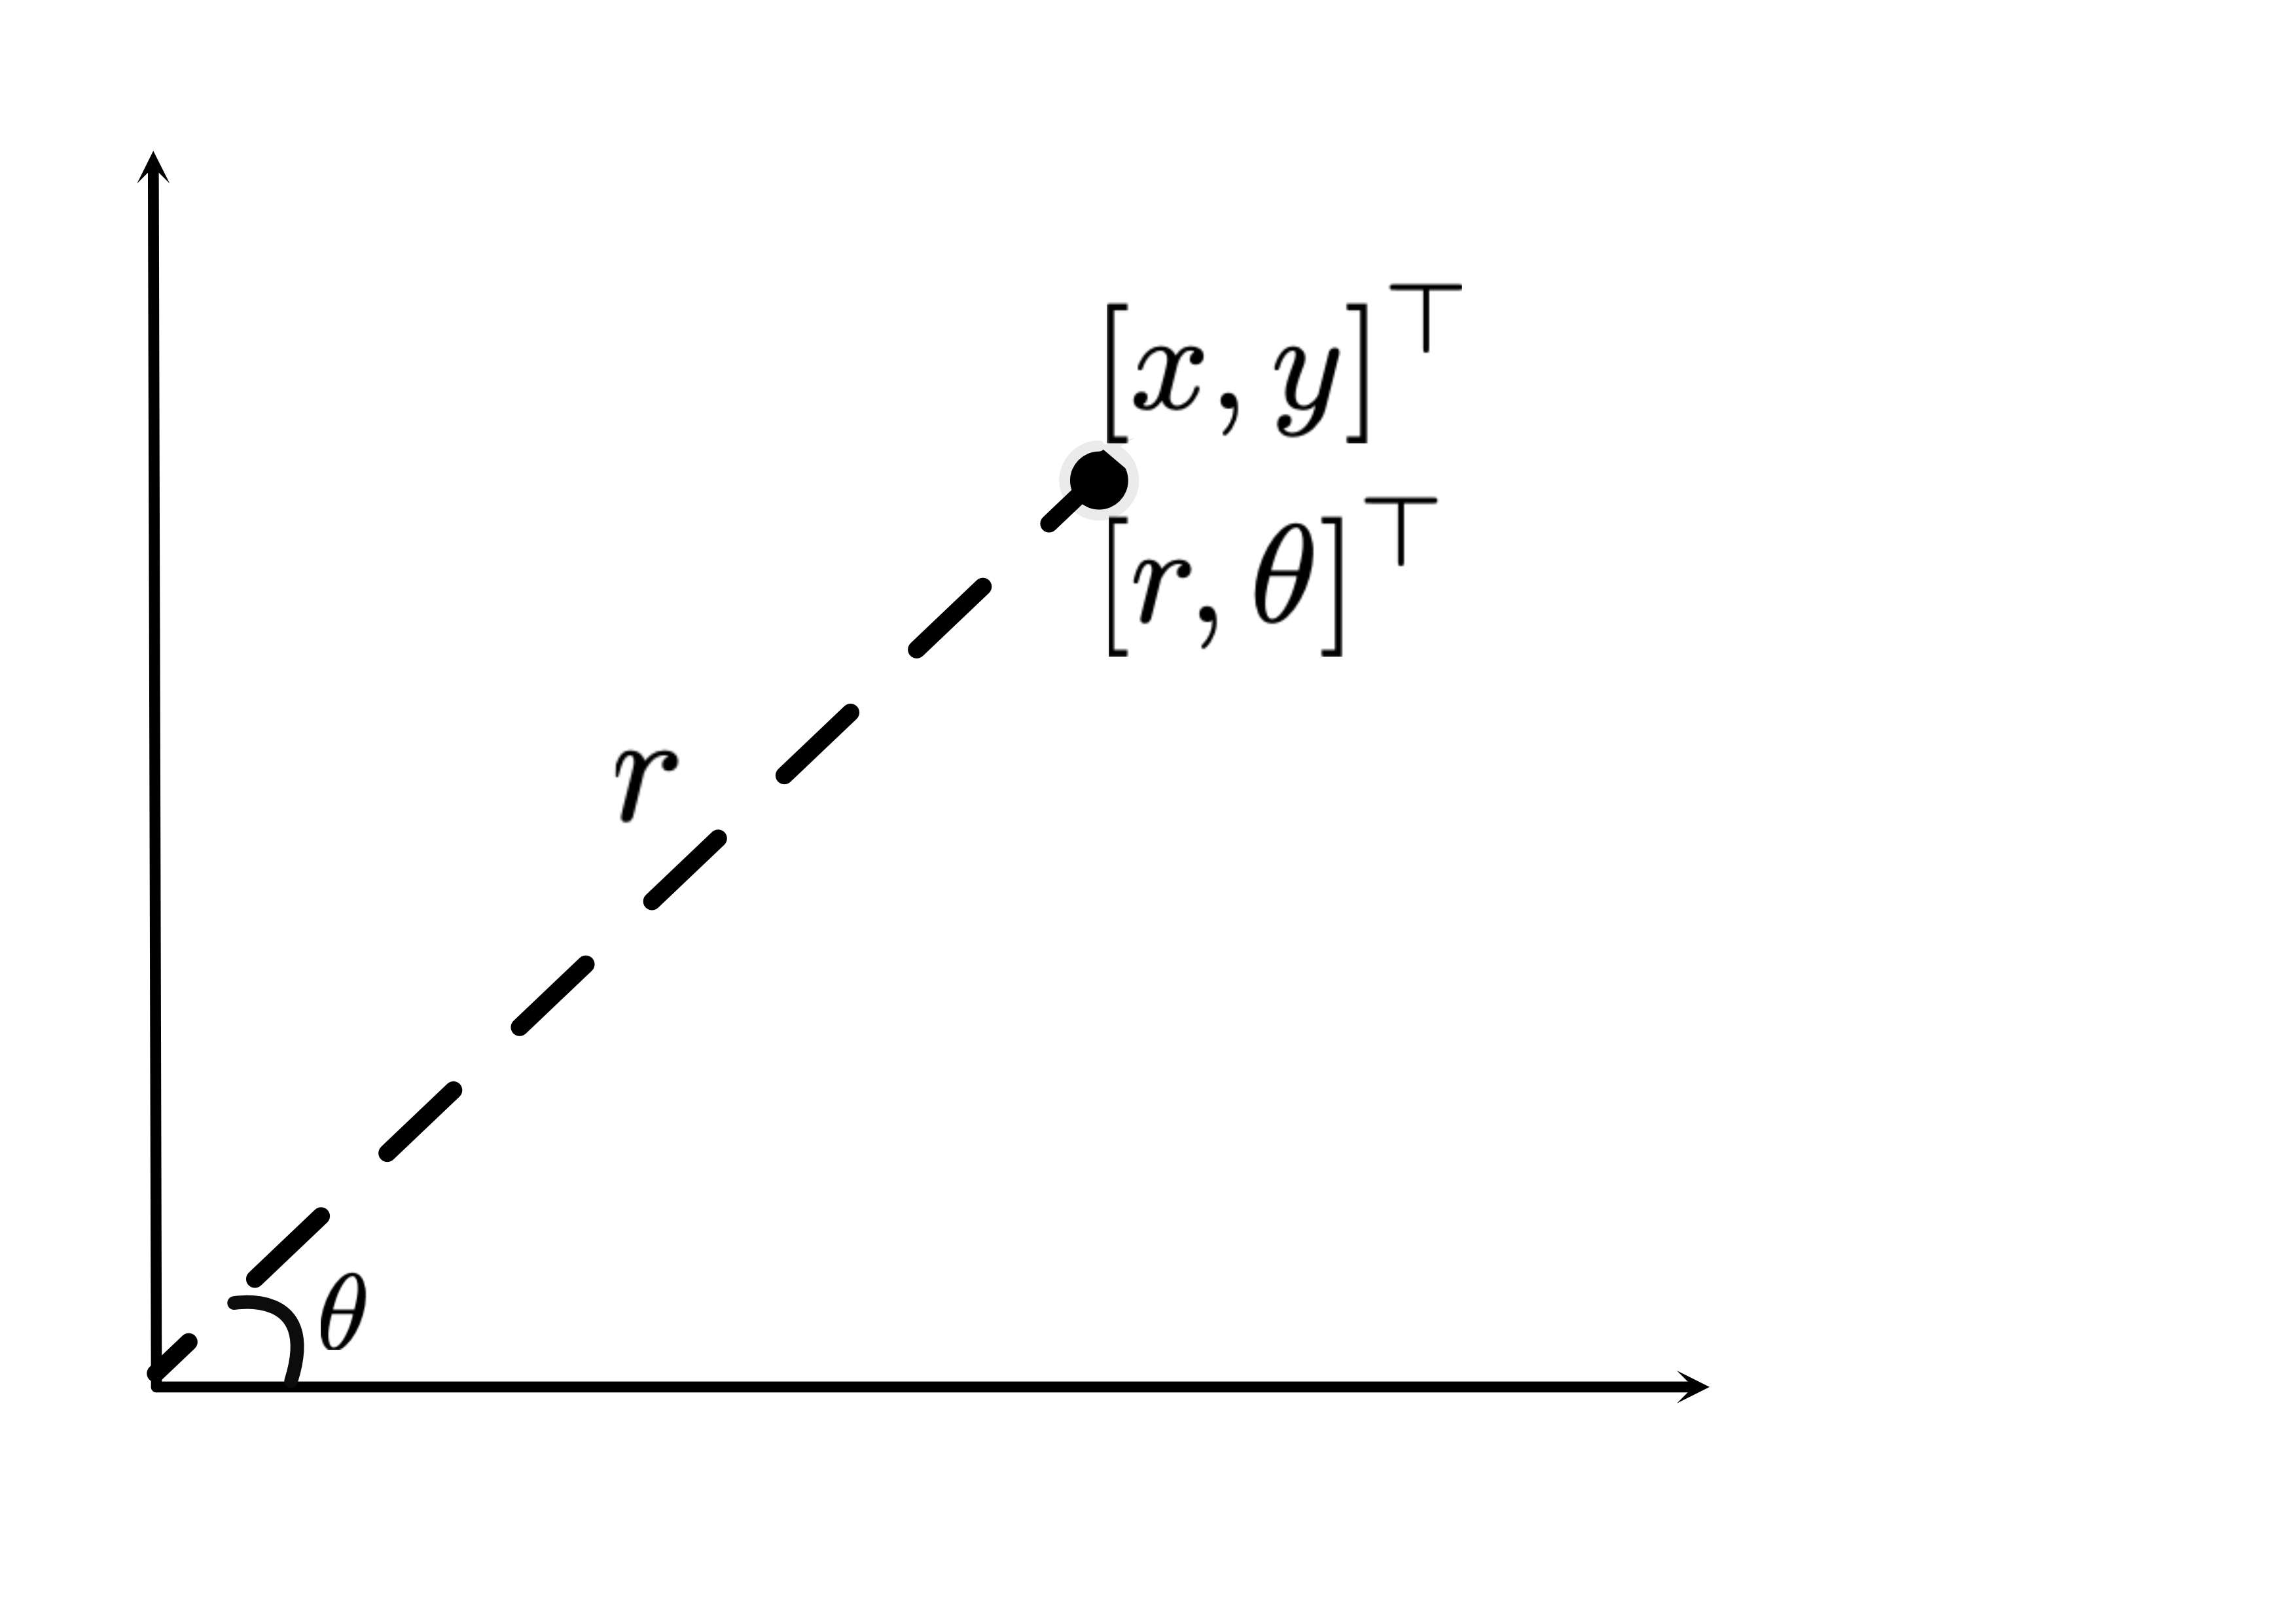

<figcaption class="figure-caption has-text-centered">Figure 1</figcaption>
</figure>
</div>
<article class="message task"><a class="anchor" id="polar"></a>
    <div class="message-header">
        <span>Task 5: Polar coordinates</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


The function `map_to_polar_separable`
 below non-linearly transforms each point $(x, y)$ to its polar coordinates $(r, \theta)$.
1. Run the cell below to visualize the dataset in polar coordinates. 
2. Compare the distribution of the data in polar versus Cartesian coordinates. What key differences do you observe?
3. Does transforming the data to polar coordinates make it easier to separate the classes with a linear classifier? How does this transformation change the classification problem?
4. Which parameter separates the classes?
5. Reflect on how pre-processing of data can change the models used for classification.
6. How is the non-linear transformation to polar coordinates different from using kernels for classification?



</div></article>



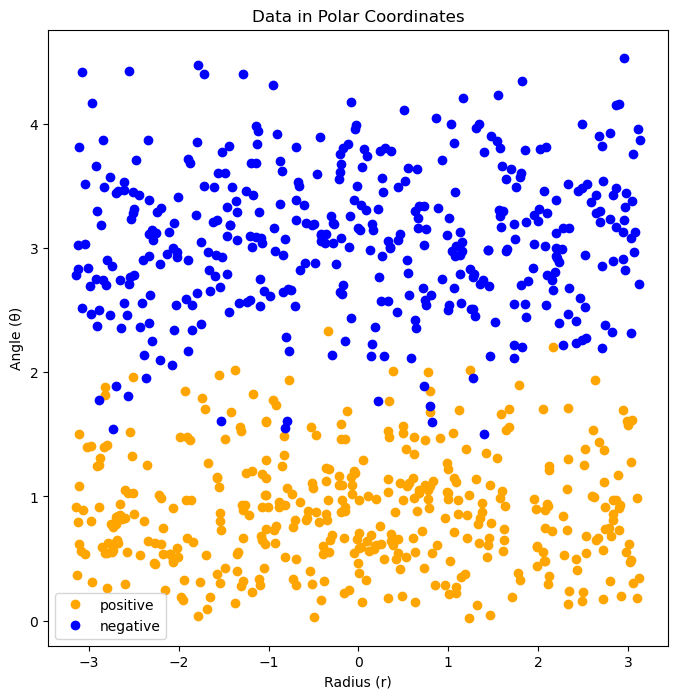

In [49]:
def map_to_polar_separable(data):
    """
    Maps circular data centered at (0, 0) to polar coordinates (r, theta),
    making the data linearly separable by radius (r).

    Parameters:
    - data: A numpy array of shape (N, 2) where each row is a point (x, y).

    Returns:
    - polar_data: A numpy array of shape (N, 2) where each row is (r, theta),
      where r is the radial distance and theta is the angle in radians.
    """
    # Convert to polar coordinates
    r = np.sqrt(data[:, 0]**2 + data[:, 1]**2)  # Radial distance
    theta = np.arctan2(data[:, 1], data[:, 0])  # Angle in radians

    # Stack r and theta to form polar data
    polar_data = np.column_stack((r, theta))

    return polar_data

data = np.vstack([q1, q2])
polar_data=map_to_polar_separable(data)

# Split polar data into classes
polar_q1 = polar_data[:len(q1)]
polar_q2 = polar_data[len(q1):]

# Plot data in polar coordinates
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(polar_q1[:, 1], polar_q1[:, 0], "o", label="positive", color="orange")
ax.plot(polar_q2[:, 1], polar_q2[:, 0], "o", label="negative", color="blue")
plt.xlabel("Radius (r)")
plt.ylabel("Angle (θ)")
plt.title("Data in Polar Coordinates")
plt.legend()
plt.show()

In [0]:
# Write reflections here
"""
1.
2. This representation allows linear separation. The data has kind of been "flattened".
3.
4. Angle
5. Correct preprocessing seems essential to be able to achieve good separation in your prediction model.
6. Polar coordinate conversion is useful in the specific usecase when data exhibits circular or radial 
patterns, as it directly maps points based on their distance and orientation from the origin. In the 
case of a circular decision boundary, for instance, using r alone might suffice to separate points 
that fall inside and outside the circle. This transformation is predefined and limited to circular/radial
structures. It won’t generalize well if data has more complex or different patterns.

Kernels, on the other hand, are mathematical functions used in machine learning models (like Support 
Vector Machines) to implicitly project data into higher-dimensional spaces where it may become linearly
separable. The transformation here isn’t tied to any fixed coordinate system but is instead a flexible,
function-based mapping that defines a similarity measure between points. Kernels can model a wide range 
of shapes and structures in data beyond circles or radial patterns.
"""